In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from IPython.display import display


plt.style.use('tp1.mplstyle')

ModuleNotFoundError: No module named 'numpy'

In [ ]:
A = 1
F = 1

# Pulse wave
x = lambda t: A * np.sign(np.sin(2 * np.pi * F * t))

# Sawtooth wave
y = lambda t: A * (t * F - np.floor(0.5 + t * F))

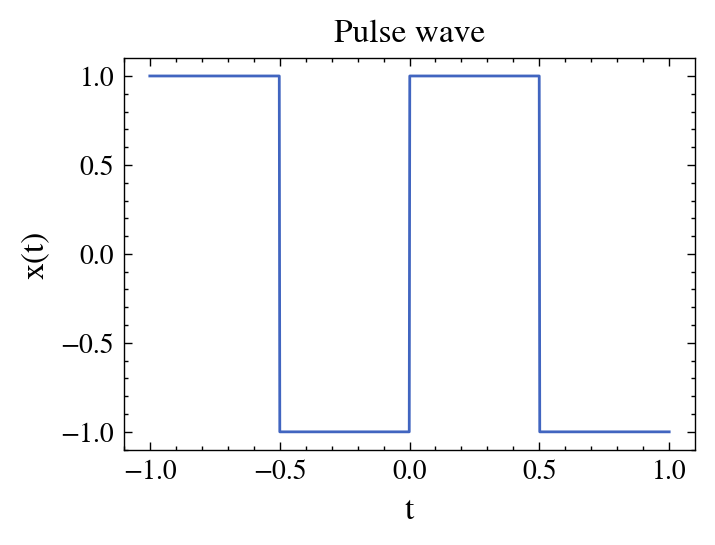

In [ ]:
# Plot pulse wave

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave')
plt.show()

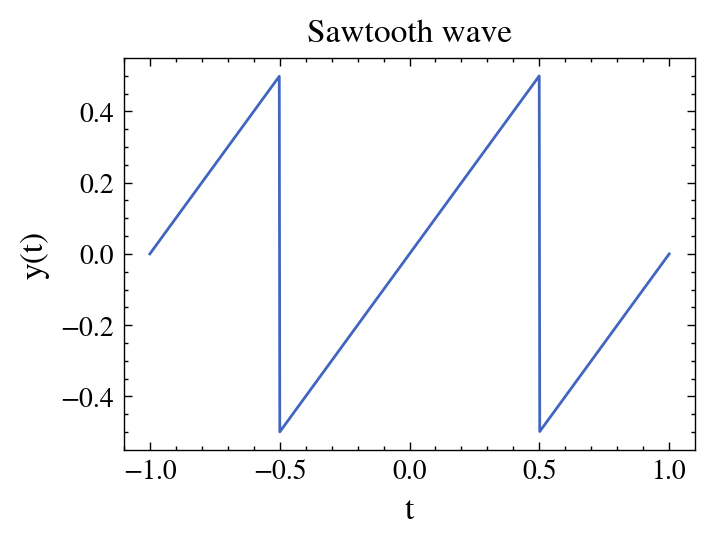

In [ ]:
# Plot sawtooth wave

t = np.linspace(-1, 1, 1000)
plt.plot(t, y(t))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Sawtooth wave')
plt.show()

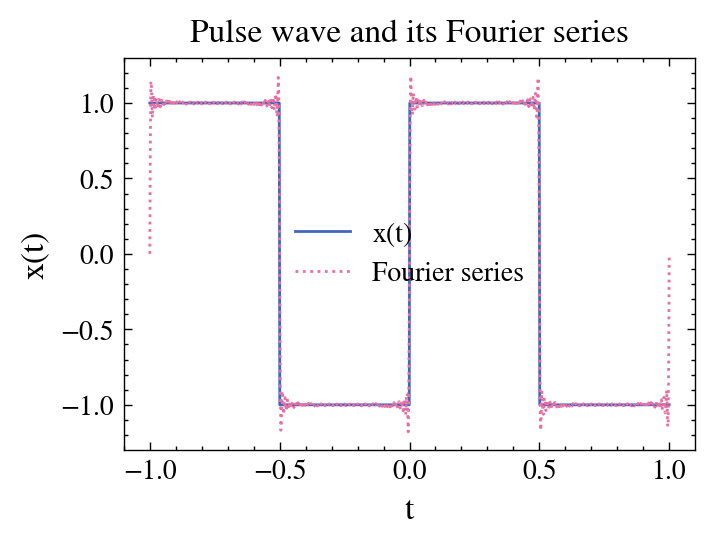

In [ ]:
def trigFourierSeries(an: callable, bn: callable, a0: float, T: float, N: int) -> callable:
    """
    Returns the trigonometric Fourier series of the function given
    the coefficients an and bn and the number of terms N.
    :param an: function that returns the coefficient an
    :param bn: function that returns the coefficient bn
    :param a0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return a0 / 2 + sum(an(n) * np.cos(2 * np.pi * n * t / T) + bn(n) * np.sin(2 * np.pi * n * t / T) for n in range(1, N + 1))
    return f

a0 = 0
an = lambda n: 0
bn = lambda n: -2 * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
T = 1 / F
N = 100

f = trigFourierSeries(an, bn, a0, T, N)

# Plot pulse wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t), label='x(t)')
plt.plot(t, f(t), label='Fourier series')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave and its Fourier series')
plt.legend()
plt.show()

/home/san/.pyenv/versions/3.11.0/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


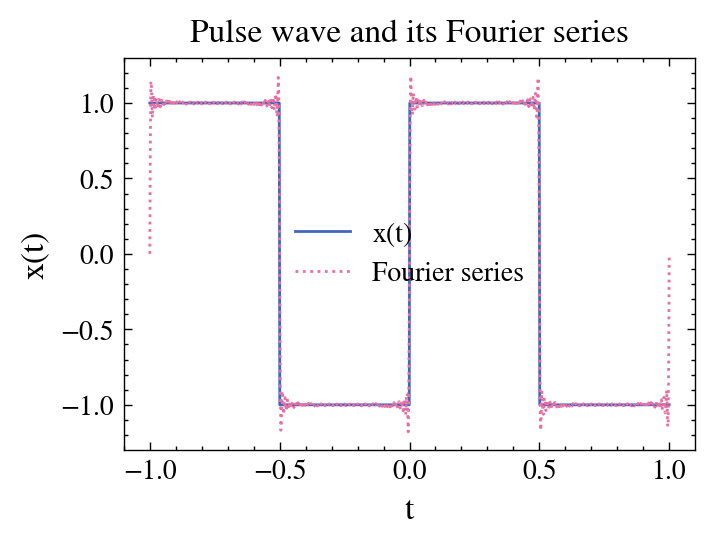

In [ ]:
def expFourierSeries(cn: callable, c0: float, T: float, N: int) -> callable:
    """
    Returns the exponential Fourier series of the function given
    the coefficient cn and the number of terms N.
    :param cn: function that returns the coefficient cn
    :param c0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return c0 + sum(cn(n) * np.exp(2 * np.pi * 1j * n * t / T) for n in range(-N, N + 1) if n != 0)
    return f

c0 = 0
cn = lambda n: 1j * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
T = 1 / F
N = 100

f = expFourierSeries(cn, c0, T, N)

# Plot pulse wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t), label='x(t)')
plt.plot(t, f(t), label='Fourier series')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave and its Fourier series')
plt.legend()
plt.show()

Realizamos las aproximaciones pero para 10, 30 y 50 armónicos

In [ ]:
# Crear la figura y los ejes para el gráfico principal y el gráfico de zoom
fig, ax = plt.subplots(figsize=(20, 12))

# Plotea la función normal y las aproximaciones en el gráfico principal
ax.plot(t, x(t), label='x(t)')
ax.plot(t, trigFourierSeries(an, bn, a0, T, 10)(t), label='Fourier series with 10 terms')
ax.plot(t, trigFourierSeries(an, bn, a0, T, 30)(t), label='Fourier series with 30 terms')
ax.plot(t, trigFourierSeries(an, bn, a0, T, 50)(t), label='Fourier series with 50 terms')

# Configurar etiquetas y leyendas en el gráfico principal
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Pulse wave and its Fourier approximation')
ax.legend(loc='lower left', fontsize="7")

# Establecer los límites originales en el gráfico principal
original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

# Establecer los límites en el gráfico principal para mostrar el rectángulo
ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

# Crear un eje de zoom (sub-gráfico) en el mismo figure
axins = inset_axes(ax, width="30%", height="30%", loc='upper right', borderpad=2)
axins.plot(t, x(t))
axins.plot(t, trigFourierSeries(an, bn, a0, T, 10)(t))
axins.plot(t, trigFourierSeries(an, bn, a0, T, 30)(t))
axins.plot(t, trigFourierSeries(an, bn, a0, T, 50)(t))

# Establecer los límites en el gráfico de zoom
axins.set_xlim(-0.025, 0.1)
axins.set_ylim(0.85, 1.22)

# Dibujar un rectángulo en el gráfico principal para indicar el área de zoom
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")

# Mostrar la figura completa
plt.show()

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 4000x2400 with 2 Axes>

\begin{align*}
x(t) = A \, sgn(\sin(2\pi ft)) \\
\rightarrow sgn(\sin(2\pi ft)) = 
\begin{cases}
-1  & \sin(2\pi ft) < 0 \\
0 & \sin(2\pi ft) = 0 \\
1 & \sin(2\pi ft) > 0 \\
\end{cases} \\
\rightarrow T = \frac{1}{f} \\
\end{align*}
Consideramos el período $ t \in \left[0, T=\frac{1}{f} \right) $

\begin{align*}
t = 0 \, \, \rightarrow sgn(\sin(2\pi ft)) = 0 \\
0 < t < \frac{1}{2f} \rightarrow sgn(\sin(2\pi ft)) = 1 \\
t = \frac{1}{2f} \rightarrow sgn(\sin(2\pi ft)) = 0 \\
\frac{1}{2f} < t < \frac{1}{f} \rightarrow sgn(\sin(2\pi ft)) = -1 \\
\end{align*}

\begin{align*}
c_n &= f \int_{-\frac{1}{2f}}^{0} -A e^{-j2\pi nft} dt + f\int_{0}^{\frac{1}{2f}} A e^{-j2\pi nft} dt \\ 
c_n &= Af \left(\int_{0}^{-\frac{1}{2f}} e^{-j2\pi nft} dt + \int_{0}^{\frac{1}{2f}} e^{-j2\pi nft} dt \right) \\
&= Af \left(-\frac{e^{-j2\pi nft}}{j 2\pi nf}\Bigg|_{0}^{-\frac{1}{2f}}  - \frac{e^{-j2\pi nft}}{j 2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right) \\
&= Af \left(-\frac{e^{-j\pi n} -1}{j2\pi nf} - \frac{e^{-j\pi n } - 1}{j2\pi nf} \right) \\ 
&= -\frac{A}{j2\pi n} \left(e^{j\pi n} + e^{-j\pi n}  -2\right) \\
&= -\frac{A}{j \pi n} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2} -1 \right) \\
&= -\frac{A}{j \pi n} \left(\cos(\pi n) - 1 \right) \\
c_n &= j\frac{A}{\pi n} \left(\cos(\pi n) - 1 \right) \\ 
\end{align*}

\begin{align*}
a_n &= 2\Re[C_n] = 2\cdot (0) = 0 \\
b_n &= -2\Im[C_n] = \frac{-2A}{\pi n} \left(\cos(\pi n) - 1 \right)
\end{align*}

-----

\begin{align*}
x(t) &= A \left(tf-\left\lfloor \frac{1}{2} + tf \right\rfloor \right) & T &= \frac{1}{f} \\
\text{Tomamos 1 período } t &\in \left[-\frac{1}{2f}, \frac{1}{2f}\right] \\
t &= -\frac{1}{2f} & \rightarrow \left\lfloor \frac{1}{2} + \left(-\frac{1}{2f} f\right) \right\rfloor &= \left\lfloor \frac{1}{2} - \frac{1}{2} \right\rfloor = 0 \\
t &= \frac{1}{2f} & \rightarrow \left\lfloor \frac{1}{2} + \frac{1}{2f} f \right\rfloor &= \left\lfloor 1 \right\rfloor = 1 \\
\rightarrow \forall -\frac{1}{2f} &\leq t < \frac{1}{2f}, \lfloor \frac{1}{2} + tf \rfloor = 0 \\
\end{align*}

\begin{align*}
c_n &= f \int_{-\frac{1}{2f}}^{\frac{1}{2f}} Atf e^{-j2\pi fnt} \, dt = Af^2 \int_{-\frac{1}{2f}}^{\frac{1}{2f}} t e^{-j2\pi fnt} \, dt \\
&= Af^2 \left[ \left(t \frac{e^{-j2\pi fnt}}{-j2\pi fn}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} - \int_{-\frac{1}{2f}}^{\frac{1}{2f}} e^{-j2\pi fnt}dt \right] \\
&= Af^2 \left[\frac{1}{2f} \frac{e^{-j\pi n}}{-j2\pi nf} + \frac{1}{2f} \frac{e^{j\pi n}}{-j2\pi nf} + \left(\frac{e^{-j2\pi fnt}}{j2\pi nf}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} \right] \\
&= Af^2 \left[-\frac{1}{2f} \left(\frac{e^{j\pi n}}{j2\pi nf} + \frac{e^{-j\pi n}}{j2\pi nf}\right) + \frac{e^{-j\pi n}}{j2\pi nf} - \frac{e^{j\pi n}}{j2\pi nf}\right] \\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2}\right) - f \left(\frac{e^{j\pi n}- e^{-j\pi n}}{2j}\right)\right] \\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \cos(\pi n) - f \sin(\pi n) \right] \\
&= \frac{A}{\pi n} \left[ \frac{j \cos(\pi n)}{2} - f \sin(\pi n) \right] \\
c_n &= \frac{A}{2\pi n} \left(j \cos(\pi n) - 2f \sin(\pi n) \right)  = -\frac{A}{2} \left[ 2f \frac{\sin(\pi n)}{\pi n} - j\frac{\cos(\pi n)}{\pi n} \right]\\
\end{align*}

\begin{align*}
\rightarrow a_n &= 2 \Re\left[c_n \right] = 2 \left[ \frac{A}{2\pi n} \left(-2f \sin(\pi n) \right) \right] = -2Af \frac{\sin(\pi n)}{\pi n} \\
\rightarrow b_n &= -2 \Im\left[c_n \right] = -2 \left[ \frac{A}{2\pi n} \left(\cos(\pi n) \right) \right] = -A \frac{\cos(\pi n)}{\pi n}
\end{align*}


-------------------

#### Señal triangular SF

\begin{align*}
x(t) = 4A\Big|\frac{t}{T} - \lfloor \frac{t}{T} + \frac{1}{2} \rfloor \Big| -A  \quad \text{con } T = \frac{1}{f}\\
\rightarrow x(t) = 4A\Big|ft - \lfloor ft + \frac{1}{2} \rfloor \Big| -A \\ 
\text{Definimos } x_I (t) / t \in I \\
I = \left[-\frac{T}{2}, \frac{T}{2}\right] = \left[ -\frac{1}{2f}, \frac{1}{2f} \right] \\
\rightarrow x_I(t) = 
\begin{cases}
-A-4Aft, & -\frac{1}{2f} \leq t < 0 \\
-A+4Aft, & 0 \leq t \leq \frac{1}{2f} \\
\end{cases} \\

\text{La función es par con respecto al eje vertical, }\,  x(t) = x(-t) \, \forall t \text{, luego } b_n = 0 \\
\end{align*}

\begin{align*}
\text{Por lo tanto solo calculamos } a_n : \\
a_n &= \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x_I(t)\cos(2\pi nft) dt \\
&= 2f \left( \int_{-\frac{T}{2}}^{0} (-A-4Aft) \cos(2\pi nft) dt + \int_{0}^{\frac{T}{2}} (-A + 4Aft) \cos(2\pi nft) dt \right) \\
\text{ (es par) } \rightarrow &= 2 \cdot 2f \int_{0}^{\frac{T}{2}} (-A+4Aft) \cos(2\pi nft) dt \\
&= -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt + 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt \\
\text{Resolvemos } -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt &= -4Af \left(\frac{\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right) \\
&= -\frac{2A}{n\pi} \sin(\pi n) = 0 \\
\text{Resolvemos la otra parte } 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt &= 16Af^2 \left( \left[\frac{t\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right] - \frac{1}{2\pi nf} \int_{0}^{\frac{1}{2f}} \sin(2\pi nft)dt \right) \\
&= 16Af^2 \left[\frac{\sin(n\pi)}{4\pi nf^2} - \frac{1}{2\pi nf} \left(-\frac{\cos(2\pi nft)}{2\pi nf}\right)\Bigg|_{0}^{\frac{1}{2f}}\right] \\
&= \frac{16Af^2}{4\pi^2 n^2 f^2} \left(\cos(n\pi) - 1 \right) = \frac{4A}{\pi^2 n^2} \left(\cos(n\pi) - 1 \right) \\
&= \frac{4A}{\pi^2 n^2} \left(\left(-1 \right)^{n} - 1 \right) = a_n 
\end{align*}